In [ ]:
!pip install -q yfinance requests transformers torch matplotlib pandas seaborn

In [ ]:

import yfinance as yf
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from transformers import pipeline

In [ ]:
# Fetch JSE  Index data
jse_index = "JSE.JO"  # JSE
data = yf.download(jse_index, period="7d", interval="1d")

# Display data
print(data.tail())

[*********************100%***********************]  1 of 1 completed

Price         Close     High      Low     Open  Volume
Ticker       JSE.JO   JSE.JO   JSE.JO   JSE.JO  JSE.JO
Date                                                  
2025-03-12  12656.0  12752.0  12440.0  12752.0  145990
2025-03-13  12689.0  12862.0  12600.0  12660.0  108782
2025-03-14  12792.0  12876.0  12521.0  12876.0   63773
2025-03-17  12706.0  12889.0  12706.0  12792.0  136876
2025-03-18  12612.0  12877.0  12550.0  12800.0  196273


In [ ]:
# Replace with your free API key if required
API_KEY = ""
NEWS_API_URL = "https://gnews.io/api/v4/search?q=JSE&lang=en&country=za&token=" + API_KEY

# Fetch news data
response = requests.get(NEWS_API_URL)
news_data = response.json()

# Extract headlines
articles = news_data.get("articles", [])
news_headlines = [article["title"] for article in articles]

# Print sample headlines
for i, headline in enumerate(news_headlines[:5]):
    print(f"{i+1}. {headline}")

1. Johannesburg is Africa's wealthiest city
2. MiX Telematics to acquire Trimble's Field Service Management Business
3. EMERGING MARKETS-Rebound in Chinese shares powers broader rally; c.bank decisions awaited
4. Delhi High Court invites applications for HJSE and JSE recruitment 2022 ; check details here
5. The biggest lesson from fifty years of trading on the JSE


In [ ]:
# Load sentiment analysis model
sentiment_pipeline = pipeline("text-classification", model="ProsusAI/finbert")

# Analyze sentiment of news headlines
sentiments = [sentiment_pipeline(headline)[0] for headline in news_headlines]

# Convert to DataFrame
sentiment_df = pd.DataFrame({
    "Headline": news_headlines,
    "Sentiment": [s["label"] for s in sentiments],
    "Score": [s["score"] for s in sentiments]
})

# Display results
print(sentiment_df)

Device set to use cpu


                                            Headline Sentiment     Score
0           Johannesburg is Africa's wealthiest city   neutral  0.828153
1  MiX Telematics to acquire Trimble's Field Serv...   neutral  0.899545
2  EMERGING MARKETS-Rebound in Chinese shares pow...  positive  0.751160
3  Delhi High Court invites applications for HJSE...   neutral  0.937798
4  The biggest lesson from fifty years of trading...   neutral  0.813365
5  The biggest lesson from 50 years of trading on...   neutral  0.804624
6  AngloGold Ashanti Submits Proposal to Acquire ...   neutral  0.907175
7  SOL: Sasol Lmited: Appointment Of Executive Di...   neutral  0.947943
8  Grindrod Shipping Holdings Ltd. Announces Shar...   neutral  0.874847
9  Alphamin Announces Record Q1 2021 EBITDA of US...   neutral  0.865207


<ipython-input-12-aaaef5f42637>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette="coolwarm")


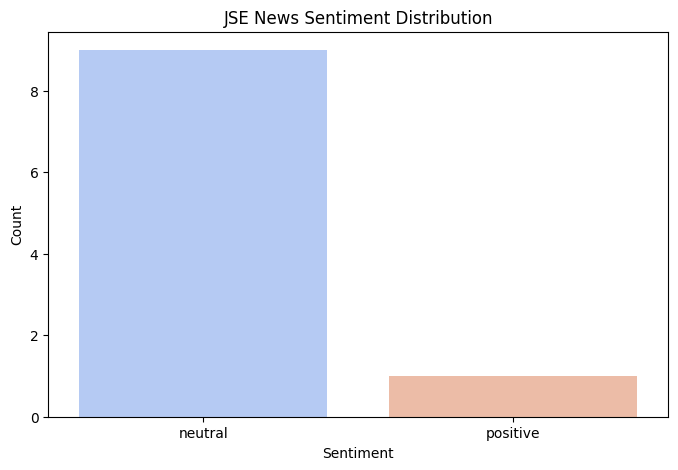

In [ ]:
# Count sentiment categories
sentiment_counts = sentiment_df["Sentiment"].value_counts()

# Plot sentiment distribution
plt.figure(figsize=(8,5))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette="coolwarm")
plt.title("JSE News Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()